# Comparativa entre distintos paradigmas de Machine Learning

Con el objetivo de ver el funcionamiento entre varias formas de hacer machine learning, vamos a desarrollar un modelo para los siguientes paradigmas:

* Support Vector Machine
* Decision Trees
* kNN
* Redes neuronales

Vamos a trabajar con la *Iris dataset* que es una base de datos que contiene las medidas de los petalos de distintas flores. Esta base de datos es una de las más conocidas dentro del medio y, es facil de entender y de implementar en modelos de ML.

In [1]:
# Importamos las librerías necesarias

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris # Para cargar la base de datos Iris
from sklearn import tree, svm, neighbors # cargamos los modelos de ML
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (10,10)

# Cargar la base de datos

La libería *sklearn* tiene precargadas varias bases de datos, entre ellas la *Iris*. Por lo tanto, ya no debemos buscarlas en la web.

En las siguientes celdas vamos cargar la dataset y definiremos los conjuntos de entrenamiento y validación.

In [4]:
dataset = load_iris()

In [5]:
type(dataset)

sklearn.utils.Bunch

In [6]:
X = dataset.data[:,0:4] # Cargamos los datos de entrada
y = dataset.target # Cargamos los datos de salida

Como la base de datos se carga como un objeto, hay que pasarlo un tipo de dato que lo pueda procesar Pandas

In [7]:
dataframe = pd.DataFrame({"Sepal_lenght":X[:,0],"Sepal_width":X[:,1],
                          "Petal_length":X[:,2],"Petal_width":X[:,3],"Class":y})
dataframe.head(-1)

,Sepal_lenght,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2


Ya que pasamos todos los datos a un **DataFrame** en *Pandas*, podemos usar las funciones de esta librería para obtener datos interesantes sobre la dataset.

In [8]:
# Una descripción estadística de la base de datos
# NOTA: Solo arroja resultados de los datos numéricos
dataframe.describe()

,Sepal_lenght,Sepal_width,Petal_length,Petal_width,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff89c5a0350>,
      dtype=object)

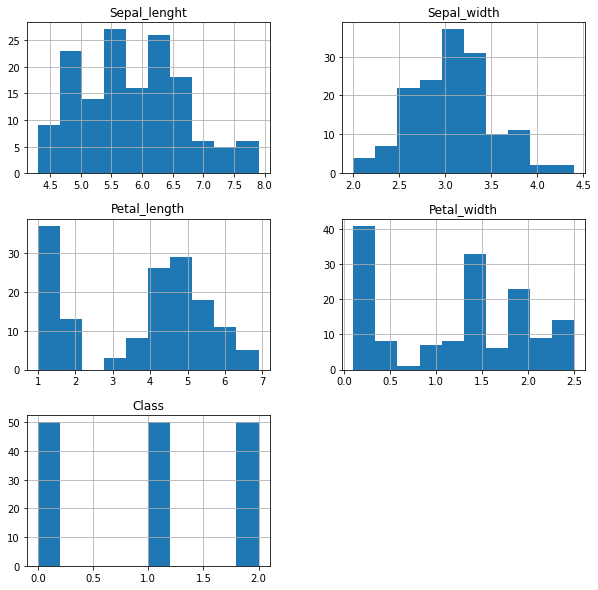

In [9]:
dataframe.hist()

Ahora vamos a usar la librería *Seaborn* para visualizar la distribución de los datos como una gráfica de dispersión.

Como *SkLearn* nos da los datos en numérico, vamos a hacer la siguiente convención:

|Valor | Especie |
|------|---------|
0 | Iris-Setosa |
1 | Iris-Versicolor |
2 | Iris-Virginica |

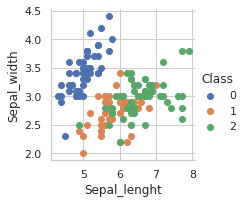

In [11]:
sns.set_style('whitegrid')
sns.FacetGrid(dataframe, hue='Class') \
   .map(plt.scatter, 'Sepal_lenght','Sepal_width') \
   .add_legend()


plt.show()

Bien, ya que vimos cómo se distribuyen los datos, ahora sí, vamos crear los modelos de ML.

Como queremos separar las especies de acuerdo a su tamaño, entonces tenemos que resolver un **problema de clasificación**.

# Creando los modelos de ML

Antes de construir los modelos, debemos generar los conjuntos de entrenamiento y prueba.

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

En la celda anterior definimos los conjuntos. Vamos a usar un 75% de los datos para entrenar los modelos, el 25% restante será para probar su desempeño.

## SVM

Como se trata de un problema de clasificación multiclase, debemos usar una variante de SVM llamada *Linear Support Vector Classification*.

In [13]:
svm_model = svm.LinearSVC(penalty='l2',
                          loss='squared_hinge',
                          dual=True,
                          C=100,
                          multi_class='ovr',
                          max_iter=1000)

En la celda anterior estamos creando el modelo SVM. De los parámetros que ingresamos, casi todos son de los más comunes en este modelo. El único parámetro que se cambió fue **C**, que indica qué tan "fuerte" debería ser la forma de resolver el problema.

In [14]:
svm_model.fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [15]:
acc_svm_train = svm_model.score(Xtrain,ytrain)
acc_svm_test = svm_model.score(Xtest,ytest)

In [16]:
print('Accuracy en el conjunto de entrenamiento: ', acc_svm_train)
print('Accuracy en el conjunto de prueba: ', acc_svm_test)

Accuracy en el conjunto de entrenamiento:  0.9732142857142857
Accuracy en el conjunto de prueba:  0.9473684210526315


## Decision Trees

A diferencia de SVM, los árboles de decisiones son más "sencillos" de implementar.

In [17]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Sin embargo, en los árboles de decisiones podemos "visualizar" el resultado.

[Text(302.25, 504.7714285714286, 'X[2] <= 2.5\ngini = 0.666\nsamples = 112\nvalue = [39, 36, 37]'),
 Text(255.75, 427.11428571428576, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(348.75, 427.11428571428576, 'X[3] <= 1.75\ngini = 0.5\nsamples = 73\nvalue = [0, 36, 37]'),
 Text(232.5, 349.4571428571429, 'X[2] <= 5.45\ngini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(186.0, 271.8, 'X[3] <= 1.65\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]'),
 Text(93.0, 194.14285714285717, 'X[2] <= 4.95\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(46.5, 116.48571428571432, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(139.5, 116.48571428571432, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(93.0, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(186.0, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(279.0, 194.14285714285717, 'X[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(232.5, 11

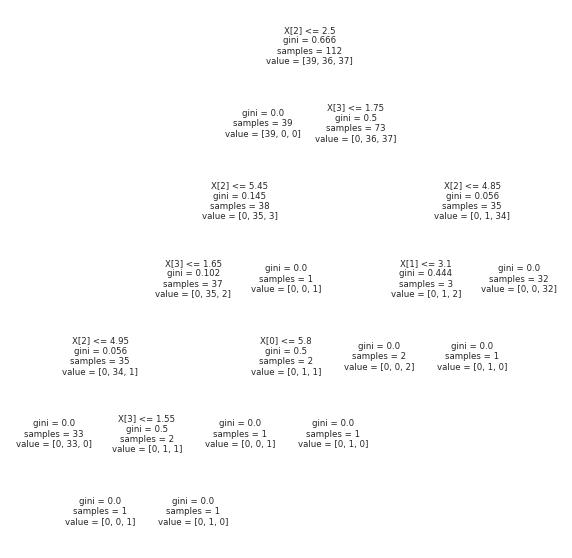

In [18]:
tree.plot_tree(dt_model)

Aunque ya terminamos la tarea de clasificación, este diagrama no se ve muy profesional. Vamos a mejoarlo

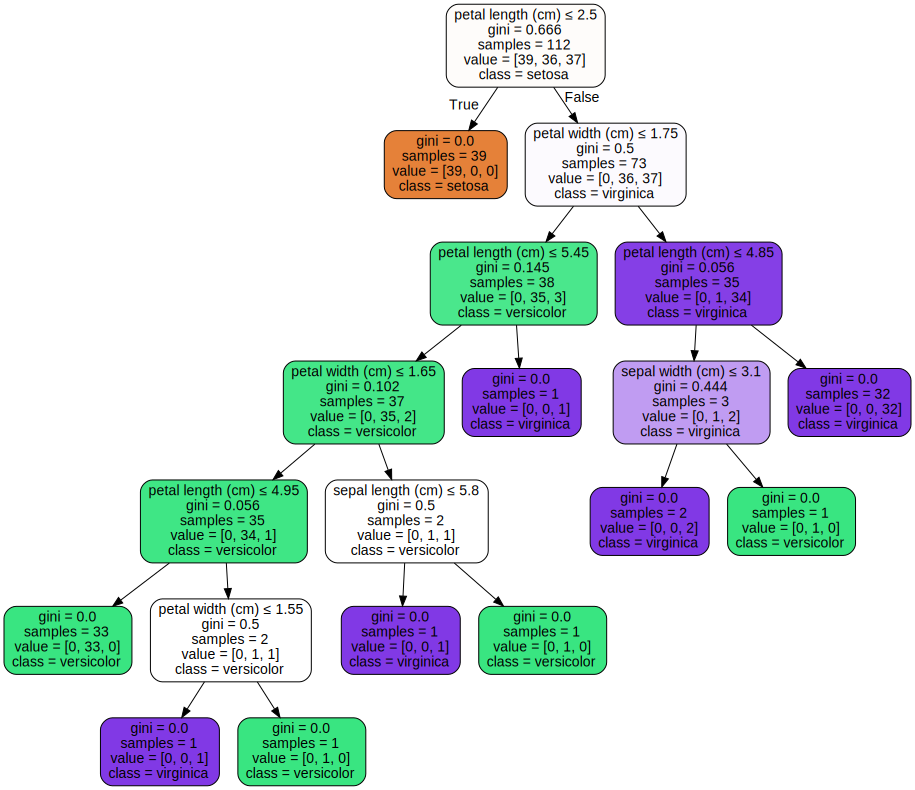

In [19]:
import graphviz

dot_data = tree.export_graphviz(dt_model,out_file=None,
                                feature_names=dataset.feature_names,
                                class_names=dataset.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

Con base a la gráfica anterior, vemos que el primer filtro para separar los datos es X3, que es la variable *Petal_width*. Despúes, el segundo nodo, la variable separadora es X2 (*Petal_length*). El resto del arbol se divide entre volver a preguntar la variable *Petal_width* y la variable *Sepal_width*.

In [33]:
acc_dt_train = dt_model.score(Xtrain,ytrain)
acc_dt_test = dt_model.score(Xtest,ytest)

print('Accuracy en el conjunto de entrenamiento: ', acc_dt_train)
print('Accuracy en el conjunto de prueba: ', acc_dt_test)

Accuracy en el conjunto de entrenamiento:  1.0
Accuracy en el conjunto de prueba:  1.0


## kNN

Ahora vamos a construir el modelo de kNN.

In [21]:
knn_model = neighbors.KNeighborsClassifier(10,weights='uniform')

knn_model.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [22]:
acc_knn_train = knn_model.score(Xtrain, ytrain)
acc_knn_test = knn_model.score(Xtest, ytest)

print('Accuracy en el conjunto de entranamiento: ', acc_knn_train)
print('Accuracy en el conjunto de prueba: ', acc_knn_test)

Accuracy en el conjunto de entranamiento:  0.9732142857142857
Accuracy en el conjunto de prueba:  1.0


## Redes neuronales

In [23]:
y_dummy = y.reshape(150,1)

In [24]:
n_xtrain, n_xtest, n_ytrain, n_ytest = train_test_split(X, y_dummy, test_size=0.25)

In [25]:
print(np.shape(n_xtrain))
print(np.shape(n_xtest))
print(np.shape(n_ytrain))
print(np.shape(n_ytest))

(112, 4)
(38, 4)
(112, 1)
(38, 1)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers


In [27]:
# Definir la arquitectura de red

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


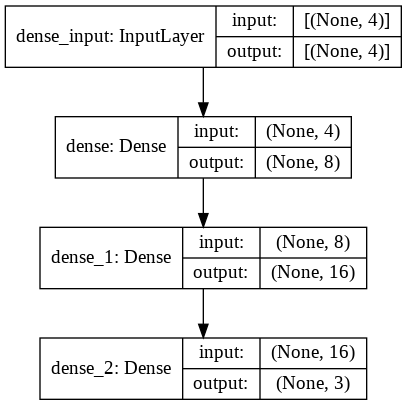

In [28]:
# Viendo de modo gráfico a la red
keras.utils.plot_model(model, show_shapes=True)

In [29]:
model.fit(n_xtrain, n_ytrain, epochs=250, batch_size=32, verbose=1)

Epoch 1/250
4/4 [==============================] - 1s 4ms/step - loss: 1.1409 - accuracy: 0.0000e+00
Epoch 2/250
4/4 [==============================] - 0s 3ms/step - loss: 1.0795 - accuracy: 0.0893
Epoch 3/250
4/4 [==============================] - 0s 3ms/step - loss: 1.0350 - accuracy: 0.3125
Epoch 4/250
4/4 [==============================] - 0s 2ms/step - loss: 0.9970 - accuracy: 0.3839
Epoch 5/250
4/4 [==============================] - 0s 3ms/step - loss: 0.9713 - accuracy: 0.5000
Epoch 6/250
4/4 [==============================] - 0s 2ms/step - loss: 0.9494 - accuracy: 0.5000
Epoch 7/250
4/4 [==============================] - 0s 3ms/step - loss: 0.9287 - accuracy: 0.4911
Epoch 8/250
4/4 [==============================] - 0s 3ms/step - loss: 0.9096 - accuracy: 0.5000
Epoch 9/250
4/4 [==============================] - 0s 3ms/step - loss: 0.8912 - accuracy: 0.5000
Epoch 10/250
4/4 [==============================] - 0s 3ms/step - loss: 0.8730 - accuracy: 0.5000
Epoch 11/250
4/4 [=======

In [32]:
acc_nn_train = model.evaluate(n_xtrain, n_ytrain)
acc_nn_test = model.evaluate(n_xtest, n_ytest)

print('Accuracy en el conjunto de entranamiento: %5.2f' %acc_nn_train[1])
print('Accuracy en el conjunto de prueba: %5.2f' %acc_nn_test[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.9737
Accuracy en el conjunto de entranamiento:  0.97
Accuracy en el conjunto de prueba:  0.97
